In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import tensorflow as tf
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

In [3]:
paths = []
labels = []
for folder, _, fils in os.walk('/Users/apple/Desktop/data/emotion reco/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data'):
    for fils in fils :
        paths.append(os.path.join(folder, fils))
        label = fils.split('_')[-1]
        #print(label)
        label = label.split('.')[0]
        #print(label)
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [5]:
paths[:5]

['/Users/apple/Desktop/data/emotion reco/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_date_disgust.wav',
 '/Users/apple/Desktop/data/emotion reco/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_rag_disgust.wav',
 '/Users/apple/Desktop/data/emotion reco/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_raise_disgust.wav',
 '/Users/apple/Desktop/data/emotion reco/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_ditch_disgust.wav',
 '/Users/apple/Desktop/data/emotion reco/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_door_disgust.wav']

In [6]:
df = pd.DataFrame()
df['speech'] = paths
df['emotion'] = labels

In [7]:
df.head()

,speech,emotion
0,/Users/apple/Desktop/data/emotion reco/TESS To...,disgust
1,/Users/apple/Desktop/data/emotion reco/TESS To...,disgust
2,/Users/apple/Desktop/data/emotion reco/TESS To...,disgust
3,/Users/apple/Desktop/data/emotion reco/TESS To...,disgust
4,/Users/apple/Desktop/data/emotion reco/TESS To...,disgust


In [8]:
df['emotion'].value_counts()

emotion
disgust    400
ps         400
happy      400
sad        400
neutral    400
fear       400
angry      400
Name: count, dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

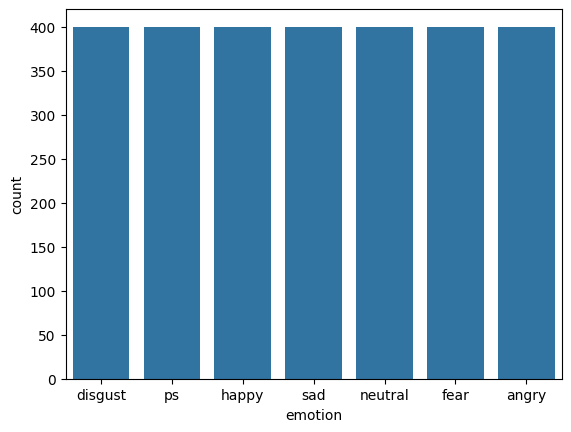

In [9]:
sns.countplot(x=df['emotion'])

In [10]:
def audioplt(data, sr, emotion):
    plt.figure(figsize=(10, 4))   # ✅ corrected spelling here
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


In [11]:
def pitchplt (data , sr , emotion):
    twoD = librosa.stft(data)#convert 1D time domain to 2D time-amplitude domain
    hz = librosa.amplitude_to_db(abs(twoD))#abs(twoD) gives spectrogram
    plt.figure(figsize = (10,4))
    plt.title(emotion , size=20)
    librosa.display.specshow(hz, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

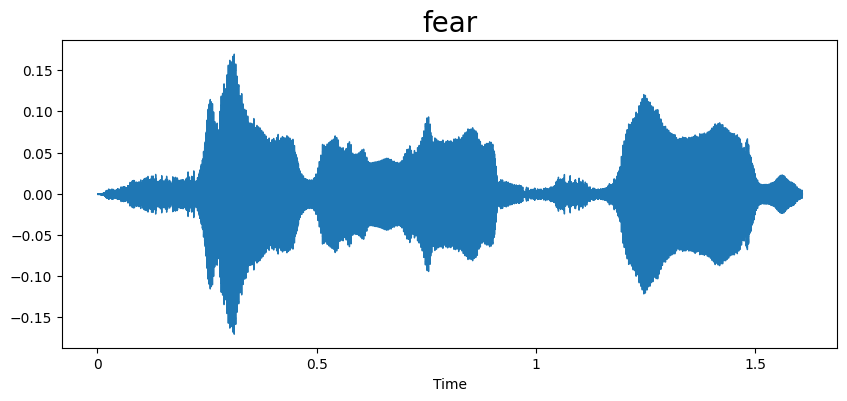

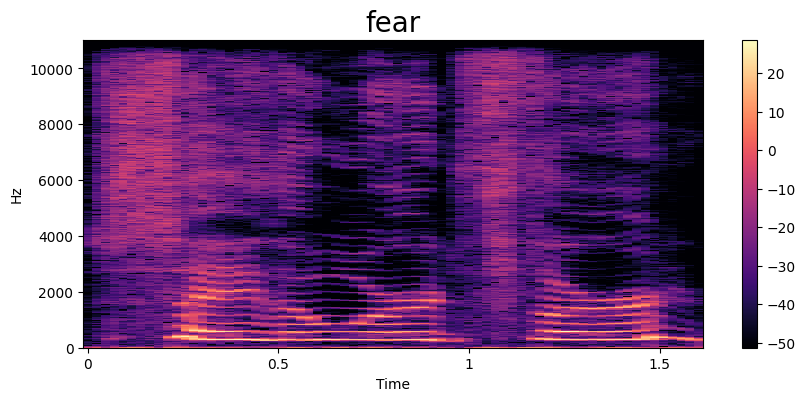

In [23]:
emotion = 'fear'
path = np.array(df['speech'][df['emotion']==emotion])[0]
data, sr = librosa.load(path)
audioplt(data, sr, emotion)
pitchplt(data, sr, emotion)
Audio(path)

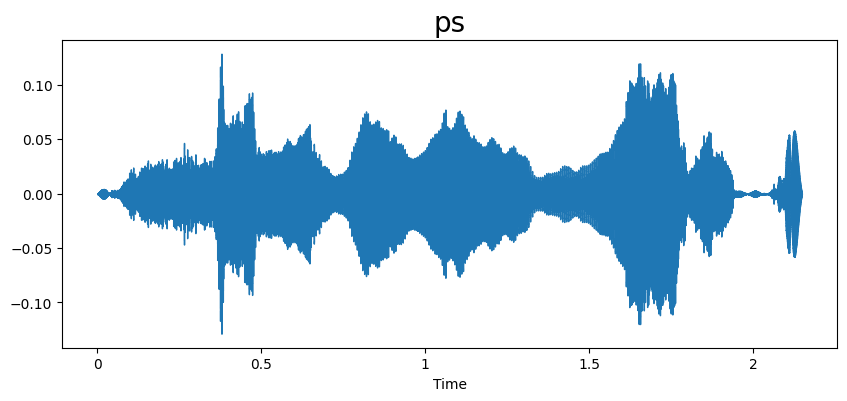

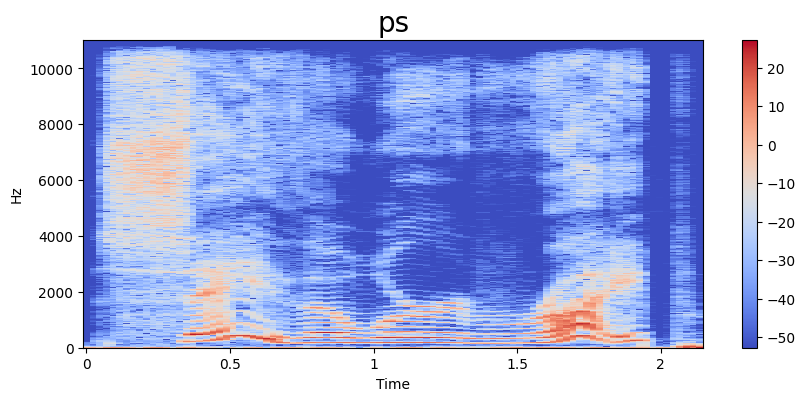

In [24]:
emotion = 'ps'
path = np.array(df['speech'][df['emotion']==emotion])[0]
data, sr = librosa.load(path)
audioplt(data, sr, emotion)
pitchplt(data, sr, emotion)
Audio(path)

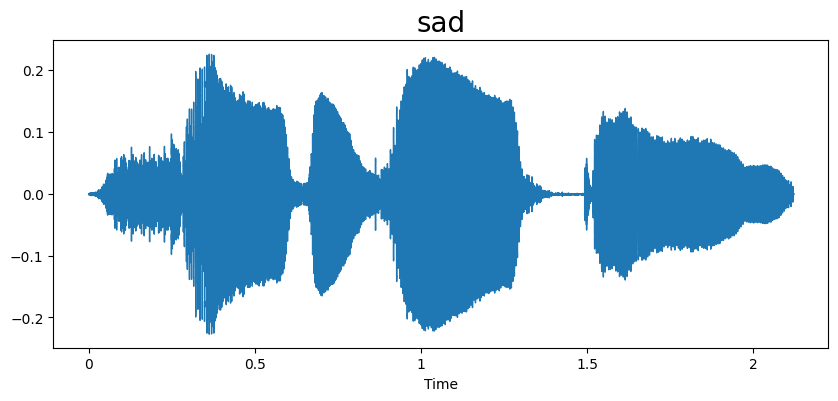

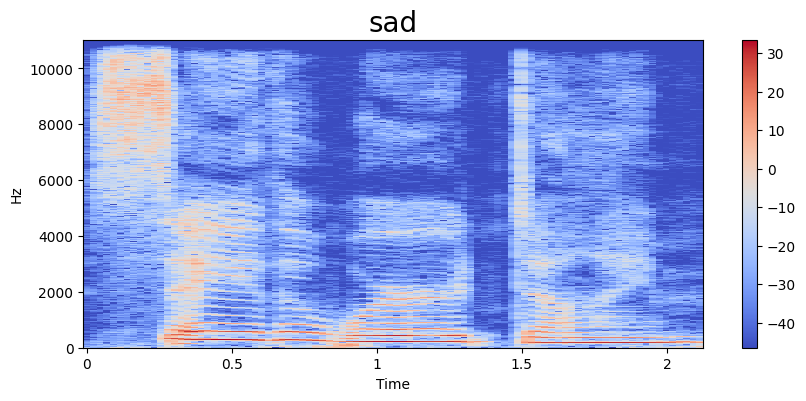

In [25]:
emotion = 'sad'
path = np.array(df['speech'][df['emotion']==emotion])[0]
data, sr = librosa.load(path)
audioplt(data, sr, emotion)
pitchplt(data, sr, emotion)
Audio(path)

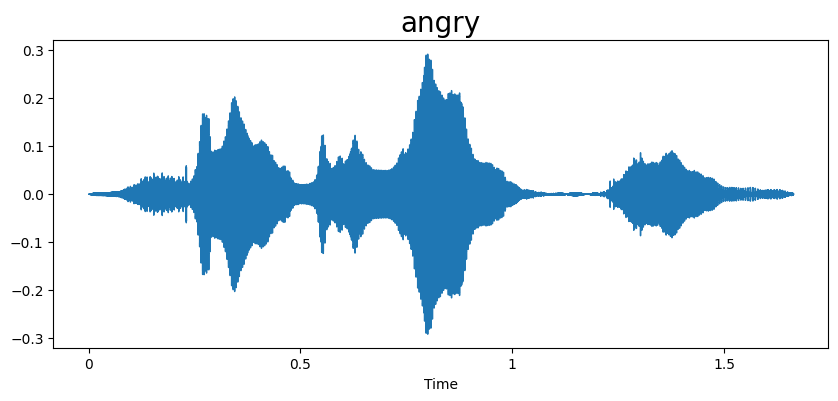

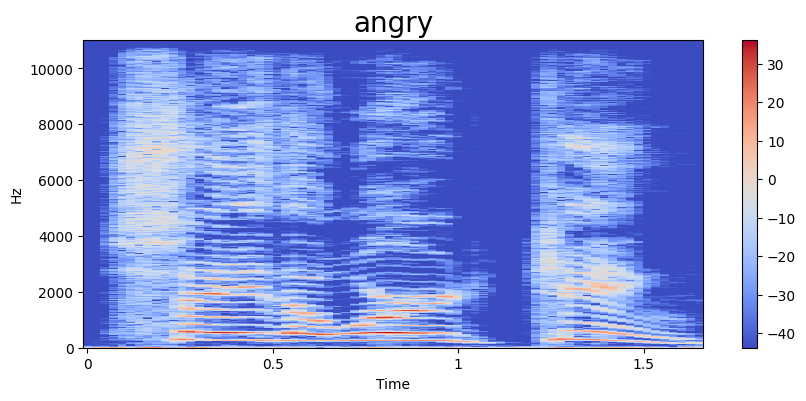

In [26]:
emotion = 'angry'
path = np.array(df['speech'][df['emotion']==emotion])[0]
data, sr = librosa.load(path)
audioplt(data, sr, emotion)
pitchplt(data, sr, emotion)
Audio(path)

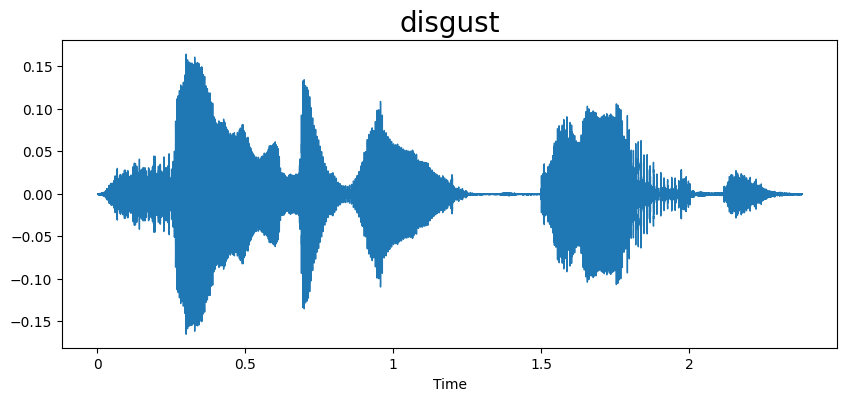

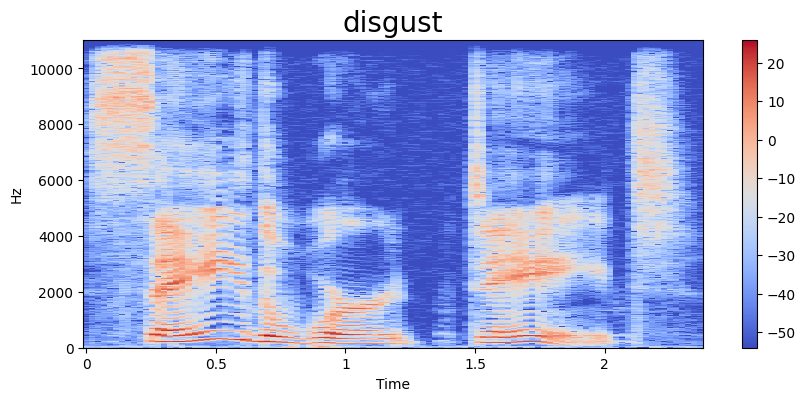

In [27]:
emotion = 'disgust'
path = np.array(df['speech'][df['emotion']==emotion])[0]
data, sr = librosa.load(path)
audioplt(data, sr, emotion)
pitchplt(data, sr, emotion)
Audio(path)

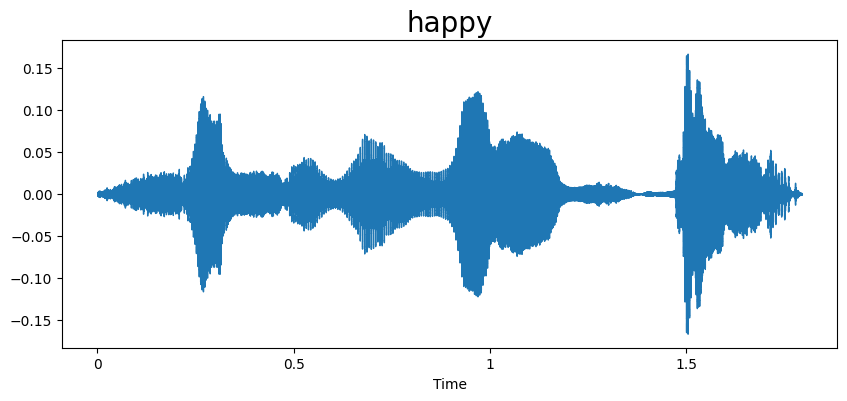

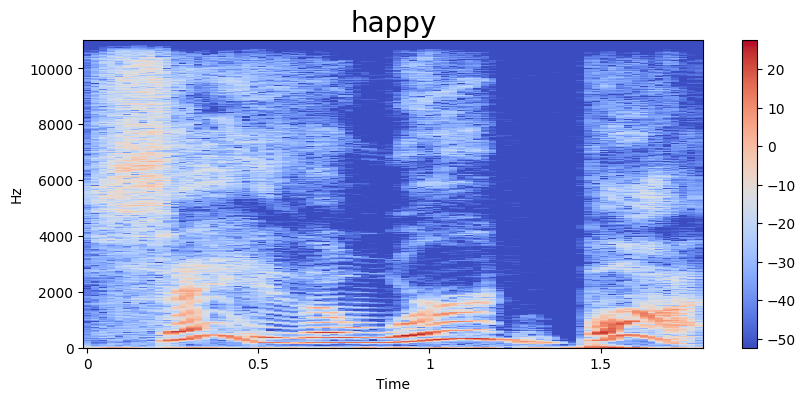

In [28]:
emotion = 'happy'
path = np.array(df['speech'][df['emotion']==emotion])[0]
data, sr = librosa.load(path)
audioplt(data, sr, emotion)
pitchplt(data, sr, emotion)
Audio(path)

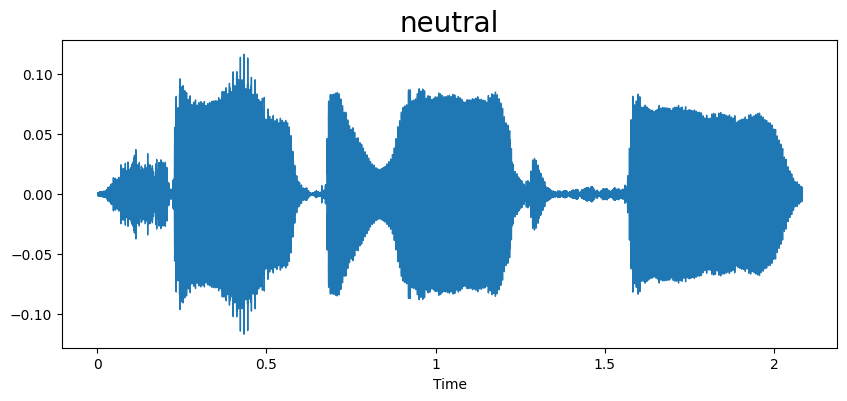

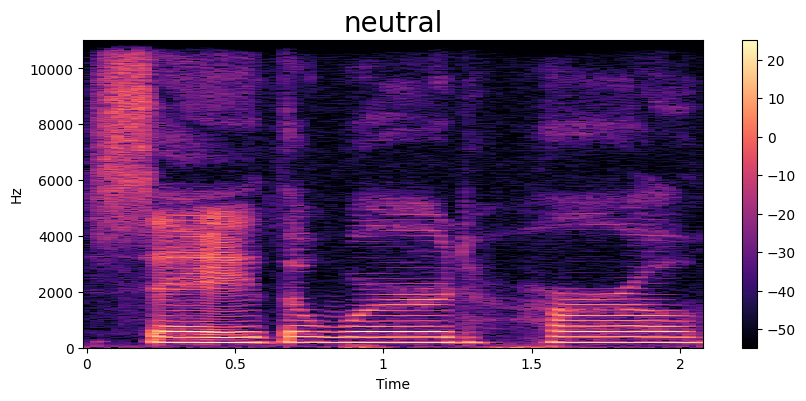

In [29]:
emotion = 'neutral'
path = np.array(df['speech'][df['emotion']==emotion])[0]
data, sr = librosa.load(path)
audioplt(data, sr, emotion)
pitchplt(data, sr, emotion)
Audio(path)

In [30]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [31]:
extract_mfcc(df['speech'][0])

array([-4.46367950e+02,  7.37893066e+01,  1.55217159e+00,  4.06268959e+01,
       -8.44945240e+00, -2.93413925e+00, -6.68220282e+00, -1.71993141e+01,
       -5.61141253e+00, -1.34095125e+01, -7.38932085e+00,  6.83708715e+00,
       -1.04589005e+01,  3.20332432e+00, -1.00376987e+00, -5.61485338e+00,
        4.25041056e+00, -1.11695576e+00, -9.11544418e+00,  2.18310452e+00,
       -7.74192667e+00,  6.46078885e-01, -3.69399524e+00,  3.72976273e-01,
       -2.00168896e+00, -1.82176363e+00, -2.78372765e+00,  2.84309292e+00,
       -3.03227854e+00,  4.50287247e+00, -8.87439787e-01,  4.21681929e+00,
        1.74084151e+00,  3.82516813e+00,  4.31301975e+00,  3.10956669e+00,
        3.51926827e+00,  4.13174629e+00,  2.25785017e+00,  2.30554032e+00],
      dtype=float32)

In [32]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x) )

In [33]:
X_mfcc

0       [-446.36795, 73.78931, 1.5521716, 40.626896, -...
1       [-383.37564, 108.15568, -17.578175, 15.888096,...
2       [-404.0382, 87.21107, 0.48702022, 22.224413, -...
3       [-444.80597, 67.52622, -3.8089027, 31.318573, ...
4       [-430.4275, 118.75985, 6.9652796, 5.20493, -8....
                              ...                        
2795    [-574.7826, 95.66922, 34.85124, 16.82163, 17.9...
2796    [-557.9271, 89.87658, 33.661488, 15.33976, 22....
2797    [-527.0877, 115.282486, 26.17239, 7.6268435, 1...
2798    [-560.78094, 121.283714, 40.30249, -1.9568784,...
2799    [-552.6838, 106.72334, 35.1727, 8.060721, 22.6...
Name: speech, Length: 2800, dtype: object

In [34]:
X_mfcc.shape

(2800,)

In [43]:
x= [x for x in X_mfcc]
x = np.array(x)
x.shape

(2800, 40)

In [44]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['emotion']])

In [45]:
y = y.toarray()

In [46]:
y.shape

(2800, 7)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.3701 - loss: 1.6797 - val_accuracy: 0.7420 - val_loss: 0.7328
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.7407 - loss: 0.6811 - val_accuracy: 0.8936 - val_loss: 0.3423
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8363 - loss: 0.4305 - val_accuracy: 0.8963 - val_loss: 0.3778
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8973 - loss: 0.3017 - val_accuracy: 0.9202 - val_loss: 0.3011
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.9244 - loss: 0.2625 - val_accuracy: 0.9255 - val_loss: 0.2012
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9334 - loss: 0.1905 - val_accuracy: 0.9309 - val_loss: 0.2151
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9540 - loss: 0.1473 - val_accuracy: 0.9468 - val_loss: 0.2157
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.9453 - loss: 0.1515 - val_accuracy: 0.95

In [51]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

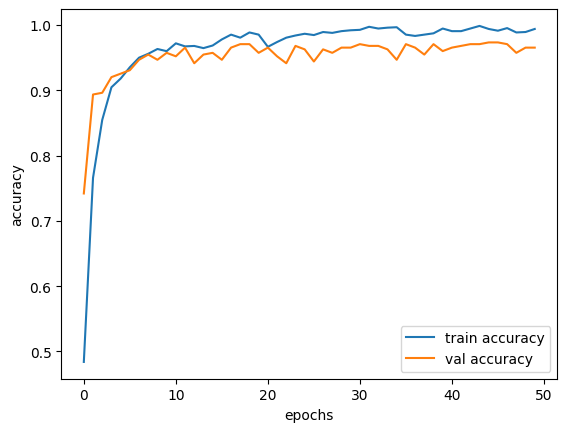

In [52]:
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

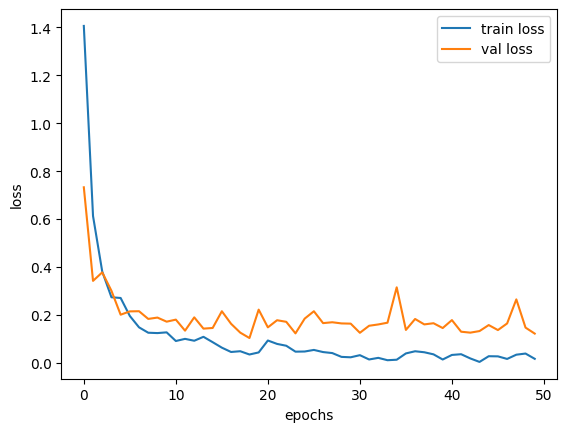

In [53]:
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [59]:
y_new = model.predict(x_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [77]:
y_pred = np.argmax(y_new, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [79]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test_classes, y_pred)
print('Accuracy :' ,Accuracy*100,'%')

Accuracy : 98.16017316017316 %


In [81]:
model.save('speech-emotion.keras')